### Plotting MS data
this notebook takes you through plotting your raw data, normalizing it and then adds some options for smoothing. Finally select the data you want to plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import smoothing as sm

Import your data, ### denotes instructions.

In [2]:
### path to file name
### optional additional sheets stored under the same or new variables
data1 = pd.read_excel('sample.xlsx', sheet_name=0)
num_species = 2 ### how many species are in your excel sheet after time column
#data1 =pd.read_excel('chromatogram-plotter/VTNA329.xlsx', sheet_name=1)
data1.head()

,t,329,615
0,0.017,1750328320,911844
1,0.034,1714736128,2403142
2,0.051,1730768896,1565826
3,0.068,1674422272,1829224
4,0.085,1675020288,2658472


data.head() prints what you have in your xlsx file. This makes it easy to see what you have labelled your columns and what species are what.
The next cell iteratively pulls out the data. There are some assumptions made about how your columns are organized so make sure time is on the left and if you have any extra columns containing tic or other information take them out of the current sheet or reconfigure the code below.

In [3]:
### extract data, iloc indexes into excel columns [row,column]
### can also use formate data1['name of column']
time = data1.iloc[:,0]                    ### or: time = data1.iloc['t']
species = []
tic = 0 * time
for index in range(num_species):
    species.append(data1.iloc[:,index+1]) ### use iloc[:,index+2] if tic column comes before species
    tic += species[index]

### if spectrum has other species or if the reaction is not 1:1 stoichiometric, 
### the tic sould be changed accordingly

#tic = data1['tic']                       ### uncomment to use a raw tic from datafram

### normalize species
norms = []
for spec in species:
    norms.append(spec/tic)
    
### you are able to change from default window/binning size
rolling_avg = sm.rolling(norms,window=11)
binned_time, binned_avg = sm.binning(time,norms,binning=11)

### Plot data
hopefully the species were extracted successfully. You will now plot them below

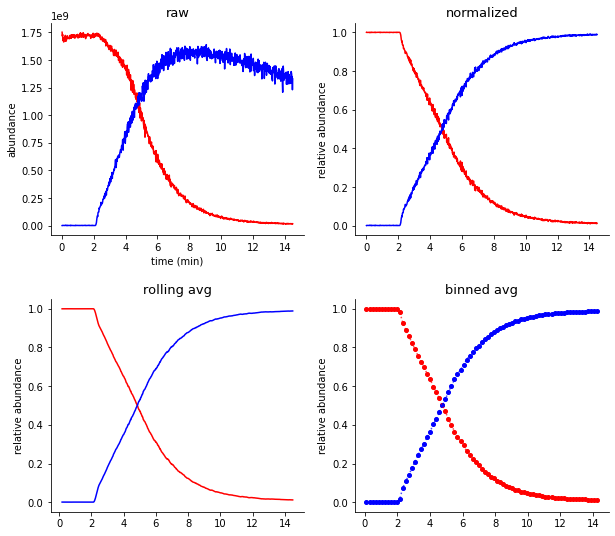

In [4]:
### plot raw data
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(10,9))
fig.subplots_adjust(hspace=0.3)
colors = ['r','b','g','orange','purple','k','yellow']

### Hide the right and top spines (stylistic choice)
for axes in (ax1,ax2,ax3,ax4):
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    ### get rid of scientific notation:
    #axes.ticklabel_format(useOffset=False, style='plain')
    
for j,specs in enumerate(species):
    ax1.plot(time, specs, color=colors[j])
ax1.set_title('raw', size=13)
ax1.set_xlabel('time (min)')
ax1.set_ylabel('abundance')

for k,norm in enumerate(norms):
    ax2.plot(time, norms[k], color=colors[k])
ax2.set_title('normalized', size=13)
#ax2.set_xlabel('time (min)')
ax2.set_ylabel('relative abundance')

for i,roll in enumerate(rolling_avg):
    ax3.plot(time, roll, color=colors[i])
ax3.set_title('rolling avg', size=13)
#ax3.set_xlabel('time (min)')
ax3.set_ylabel('relative abundance')

for m,binn in enumerate(binned_avg):
    ax4.scatter(binned_time, binn, s=16, marker='o', color=colors[m])
    ax4.plot(binned_time,binn, color=colors[m], linestyle=':',alpha=0.7)
ax4.set_title('binned avg', size=13)
#ax3.set_xlabel('time (min)')
ax4.set_ylabel('relative abundance')

plt.show()
#plt.savefig('raw-vs-norm-vs-smoothed.png', dpi=400, transparent=True)

### Adjust Normalization settings
Window size will change how smoothed your traces become. If you need to use a large window size with respect to the number of data points you have, binning may be a more appropriate way to present your data.

In [9]:
### choose your preferred window size or binning to plot rolling or binned average of data
### and plot your data with selected smoothing function
t = time   ### so we don't overwrite our original time
final = sm.rolling(norms,window=10)                  ### uncomment for plotting rolling avg
#t, final = sm.binning(time,norms,binning=10)        ### uncomment for plotting binned data

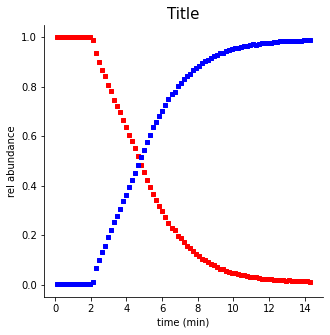

In [11]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
color = ['r','b','g','orange']
### turn of spines if need be:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for l,spec in enumerate(final):
    ax.plot(t, spec, color=colors[l], linewidth=3)            ### uncomment for plotting rolling avg
    #ax.scatter(t, spec, color=colors[l], marker='s', s= 10)  ### uncomment for plotting binned data
ax.set_title('Title', size=15)
ax.set_xlabel('time (min)')
ax.set_ylabel('rel abundance')

plt.show()
#plt.savefig('smoothed.png', dpi=300, transparent=True)       ### uncomment to save